# 教師あり学習（回帰）

## 概要

scikit-learn に付属する
[Toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset) の
[Wine recognition dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset) を用いて,
ワインのアルコール度数などのデータから, ワインの種類を予測する決定木分類を行う.

## 実装

インポート & matplotlib を inline にする.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[Wine recognition dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset) を読み込む.

In [2]:
from sklearn.datasets import load_wine

wine_data = load_wine(as_frame=True)

読み込んだデータ (`wine_data.data`) は以下の通りである.

In [3]:
wine_data.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


それぞれのデータに対するワインの種類 (`wine_data.target`) は以下の通りである.

In [4]:
wine_data.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

ワインの種類の名前 (`wine_data.target_names`) は, 以下の通りである.

In [5]:
wine_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

この情報を用いると, それぞれのデータに対するワインの種類の名前を得られる.

In [6]:
wine_name_df = pd.DataFrame(
    wine_data.target.map(lambda i: wine_data.target_names[i]),
).rename(columns={"target": "Name"})


wine_name_df

,Name
0,class_0
1,class_0
2,class_0
3,class_0
4,class_0
...,...
173,class_2
174,class_2
175,class_2
176,class_2


説明変数をワインのデータ, 目的変数をワインの種類とする.

In [7]:
X = wine_data.data
y = wine_name_df

説明変数, 目的変数をそれぞれ学習用データ, テスト用データに分割する. 
学習用データとテスト用データの量の比は, $7 : 3$ とし, ランダムに分割するシード値は `0` とする.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

決定木分類モデルである, `DecisionTreeClassifier` クラスをインスタンス化し, 学習用の説明変数, 目的変数それぞれのデータを用いて学習する.

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

学習の結果, 決定木が得られた.

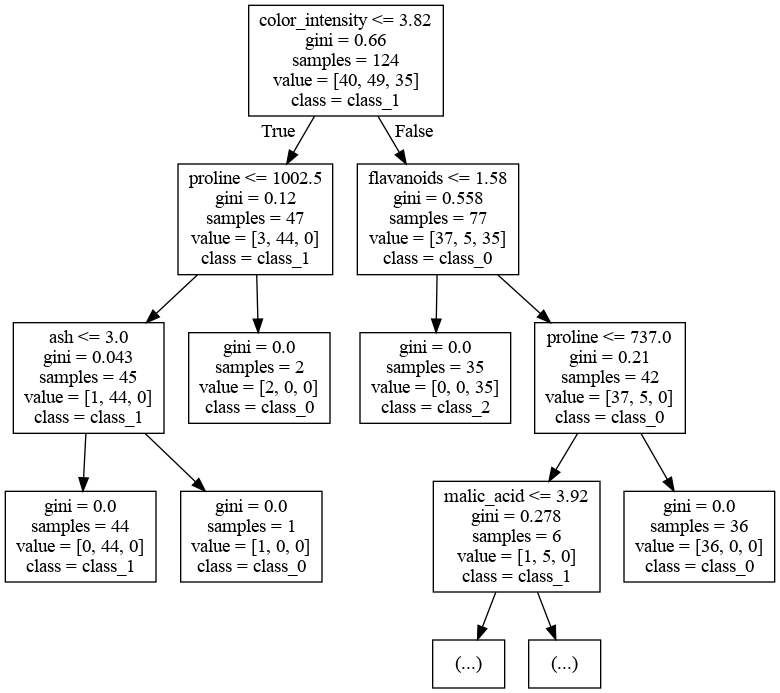

In [10]:
from six import StringIO
from IPython.display import Image
import sklearn.tree as tree
import pydotplus


dot_data = StringIO()

tree.export_graphviz(
    model,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=model.classes_,
    max_depth=3
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

学習用データ, テスト用データそれぞれのスコアを算出する.

In [11]:
print(f'train\t: {model.score(X_train, y_train)}')
print(f'test\t: {model.score(X_test, y_test)}')

train	: 1.0
test	: 0.9444444444444444
